# New Section

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import utils, callbacks
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from glob import glob
import sklearn
!pip install visualkeras
import visualkeras
!pip install ann-visualizer
import ann_visualizer
from ann_visualizer.visualize import ann_viz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4169 sha256=7b3faf7a627463618b6dc9ca535917ac99de76c51ba4d34865545c9913afce2d
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann-visualizer


In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d prathumarikeri/indian-sign-language-isl

Dataset URL: https://www.kaggle.com/datasets/prathumarikeri/indian-sign-language-isl
License(s): CC-BY-SA-4.0
 98% 276M/281M [00:08<00:00, 40.8MB/s]
100% 281M/281M [00:08<00:00, 34.1MB/s]


In [ ]:
! mkdir dataset

In [ ]:
! unzip indian-sign-language-isl.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Indian/V/819.jpg  
  inflating: dataset/Indian/V/82.jpg  
  inflating: dataset/Indian/V/820.jpg  
  inflating: dataset/Indian/V/821.jpg  
  inflating: dataset/Indian/V/822.jpg  
  inflating: dataset/Indian/V/823.jpg  
  inflating: dataset/Indian/V/824.jpg  
  inflating: dataset/Indian/V/825.jpg  
  inflating: dataset/Indian/V/826.jpg  
  inflating: dataset/Indian/V/827.jpg  
  inflating: dataset/Indian/V/828.jpg  
  inflating: dataset/Indian/V/829.jpg  
  inflating: dataset/Indian/V/83.jpg  
  inflating: dataset/Indian/V/830.jpg  
  inflating: dataset/Indian/V/831.jpg  
  inflating: dataset/Indian/V/832.jpg  
  inflating: dataset/Indian/V/833.jpg  
  inflating: dataset/Indian/V/834.jpg  
  inflating: dataset/Indian/V/835.jpg  
  inflating: dataset/Indian/V/836.jpg  
  inflating: dataset/Indian/V/837.jpg  
  inflating: dataset/Indian/V/838.jpg  
  inflating: dataset/Indian/V/839.jpg  
  inflating: dataset/Indian/V/8

In [ ]:
data_folder = '/content/dataset/Indian'

In [ ]:
def load_images():
    images = []
    labels = []
    index = -1
    folders = sorted(os.listdir(data_folder))

    for folder in folders:
        index += 1

        print("Loading images from folder ", folder ," has started.")
        for image in os.listdir(data_folder + '/' + folder):
            img = cv2.imread(data_folder + '/' + folder + '/' + image, 0)


            img = edge_detection(img)
            img = cv2.resize(img, (64, 64))
            img = img_to_array(img)
            images.append(img)
            labels.append(index)

    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = to_categorical(labels)

    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

    return x_train, x_test, y_train, y_test

def edge_detection(image):
    minValue = 70
    blur = cv2.GaussianBlur(image,(5,5),2)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return res

In [ ]:
x_train, x_test, y_train, y_test = load_images()

Loading images from folder  1  has started.
Loading images from folder  2  has started.
Loading images from folder  3  has started.
Loading images from folder  4  has started.
Loading images from folder  5  has started.
Loading images from folder  6  has started.
Loading images from folder  7  has started.
Loading images from folder  8  has started.
Loading images from folder  9  has started.
Loading images from folder  A  has started.
Loading images from folder  B  has started.
Loading images from folder  C  has started.
Loading images from folder  D  has started.
Loading images from folder  E  has started.
Loading images from folder  F  has started.
Loading images from folder  G  has started.
Loading images from folder  H  has started.
Loading images from folder  I  has started.
Loading images from folder  J  has started.
Loading images from folder  K  has started.
Loading images from folder  L  has started.
Loading images from folder  M  has started.
Loading images from folder  N  h

In [ ]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=17)
x_test, y_test = shuffle(x_test, y_test, random_state=17)

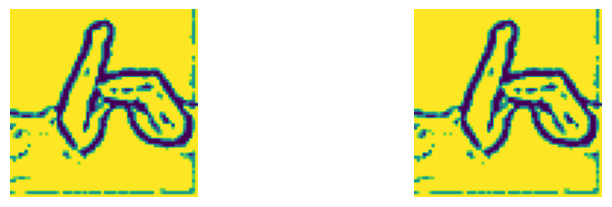

In [ ]:
alpha = [chr(c) for c in range(65,91)]
un,count = np.unique(y_train,return_counts=True)
j=1
plt.figure(figsize=(20,20))
for i in un:
    plt.subplot(7,4,j)
    plt.imshow(x_train[np.where(y_train == np.array(i))[0][0]])
    plt.axis('off')
    j=j+1

In [ ]:
map_characters = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: 'A', 10: 'B', 11: 'C', 12: 'D',
                  13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'I', 18: 'J', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P',
                  25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'W', 32: 'X', 33: 'Y', 34: 'Z'}

In [ ]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',padding="same", input_shape=(64, 64, 1)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3),padding="same", activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3),padding="same", activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(35, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 35)                  │           4,515 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 584,675 (2.23 MB)

 Trainable params: 584,675 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


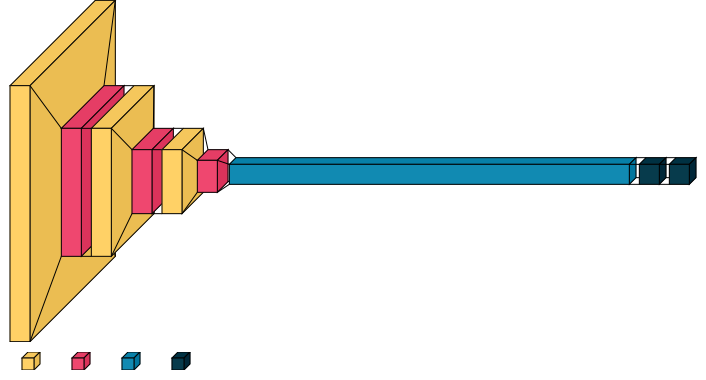

In [ ]:
visualkeras.layered_view(model,legend=True)

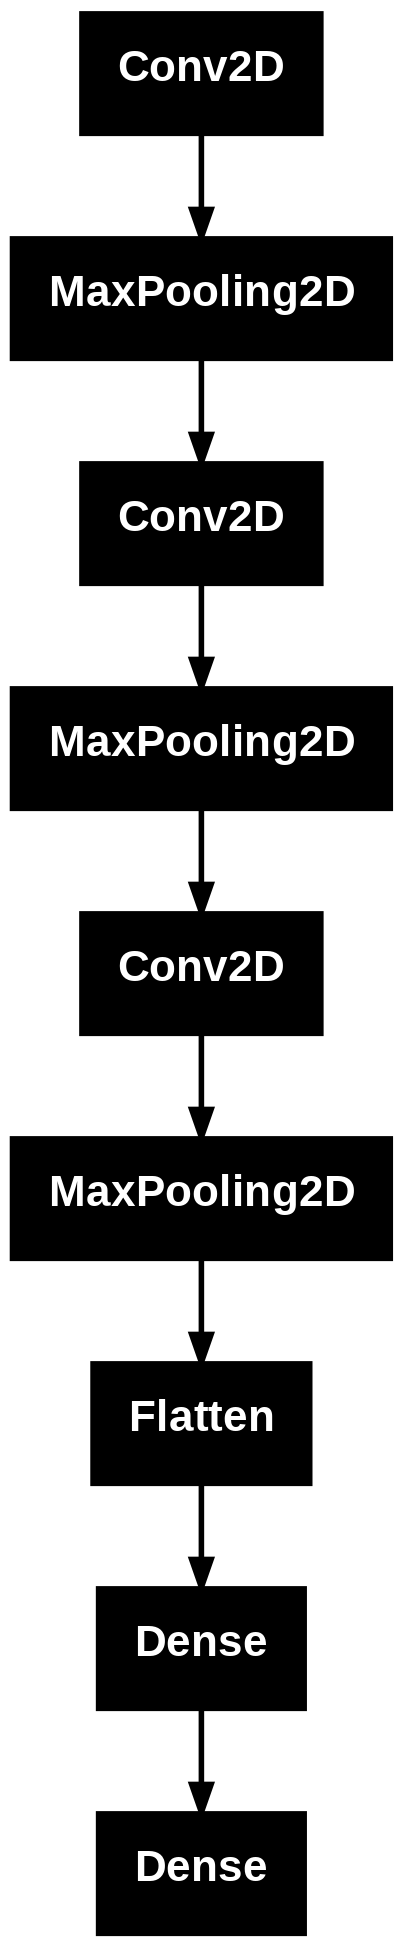

In [ ]:
keras.utils.plot_model(model)

In [ ]:
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [ ]:
classes = 35
epochs = 50


adam = Adam(learning_rate=0.00001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test), shuffle=True)

Epoch 1/50
1069/1069 - 15s - 14ms/step - accuracy: 0.4575 - loss: 2.7593 - val_accuracy: 0.9346 - val_loss: 0.7860
Epoch 2/50
1069/1069 - 5s - 5ms/step - accuracy: 0.9780 - loss: 0.2470 - val_accuracy: 0.9897 - val_loss: 0.0845
Epoch 3/50
1069/1069 - 6s - 5ms/step - accuracy: 0.9934 - loss: 0.0473 - val_accuracy: 0.9959 - val_loss: 0.0273
Epoch 4/50
1069/1069 - 10s - 9ms/step - accuracy: 0.9975 - loss: 0.0174 - val_accuracy: 0.9987 - val_loss: 0.0119
Epoch 5/50
1069/1069 - 5s - 5ms/step - accuracy: 0.9990 - loss: 0.0081 - val_accuracy: 0.9991 - val_loss: 0.0067
Epoch 6/50
1069/1069 - 11s - 10ms/step - accuracy: 0.9996 - loss: 0.0043 - val_accuracy: 0.9991 - val_loss: 0.0046
Epoch 7/50
1069/1069 - 9s - 9ms/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.9994 - val_loss: 0.0027
Epoch 8/50
1069/1069 - 6s - 6ms/step - accuracy: 0.9999 - loss: 0.0014 - val_accuracy: 0.9993 - val_loss: 0.0023
Epoch 9/50
1069/1069 - 5s - 5ms/step - accuracy: 0.9999 - loss: 9.7102e-04 - val_accuracy: 

In [ ]:
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()


def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [ ]:
class_labels = list(map_characters.values())

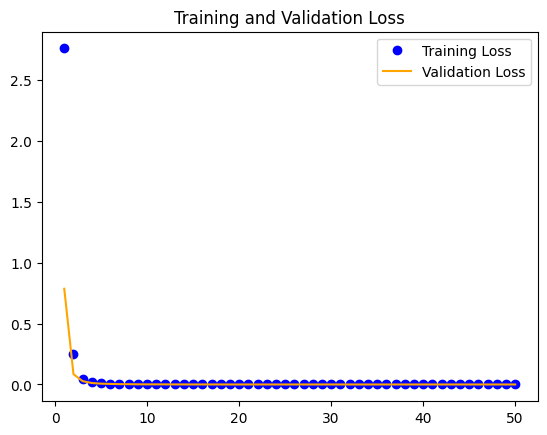

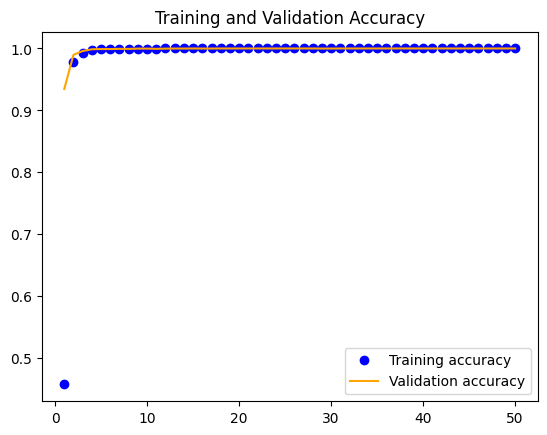

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [ ]:
score = model.evaluate(x_test,y_test, verbose=0)
print(score)
print('\nKeras CNN - accuracy:', score[1], '\n')

y_pred = model.predict(x_test, verbose = 1)
#print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='')
Y_pred_classes = np.argmax(y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
report = metrics.classification_report(Y_true, Y_pred_classes, target_names=class_labels)
print(report)

[4.195367728243582e-05, 1.0]

Keras CNN - accuracy: 1.0 

268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       240
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       234
           5       1.00      1.00      1.00       237
           6       1.00      1.00      1.00       245
           7       1.00      1.00      1.00       227
           8       1.00      1.00      1.00       233
           9       1.00      1.00      1.00       227
           A       1.00      1.00      1.00       265
           B       1.00      1.00      1.00       245
           C       1.00      1.00      1.00       295
           D       1.00      1.00      1.00       231
           E       1.00      1.00      1.00       238
           F       1.00      1.00      1.00       245
           G       1.00      1.00   

In [ ]:
model.save('ISL_Predictor.h5')

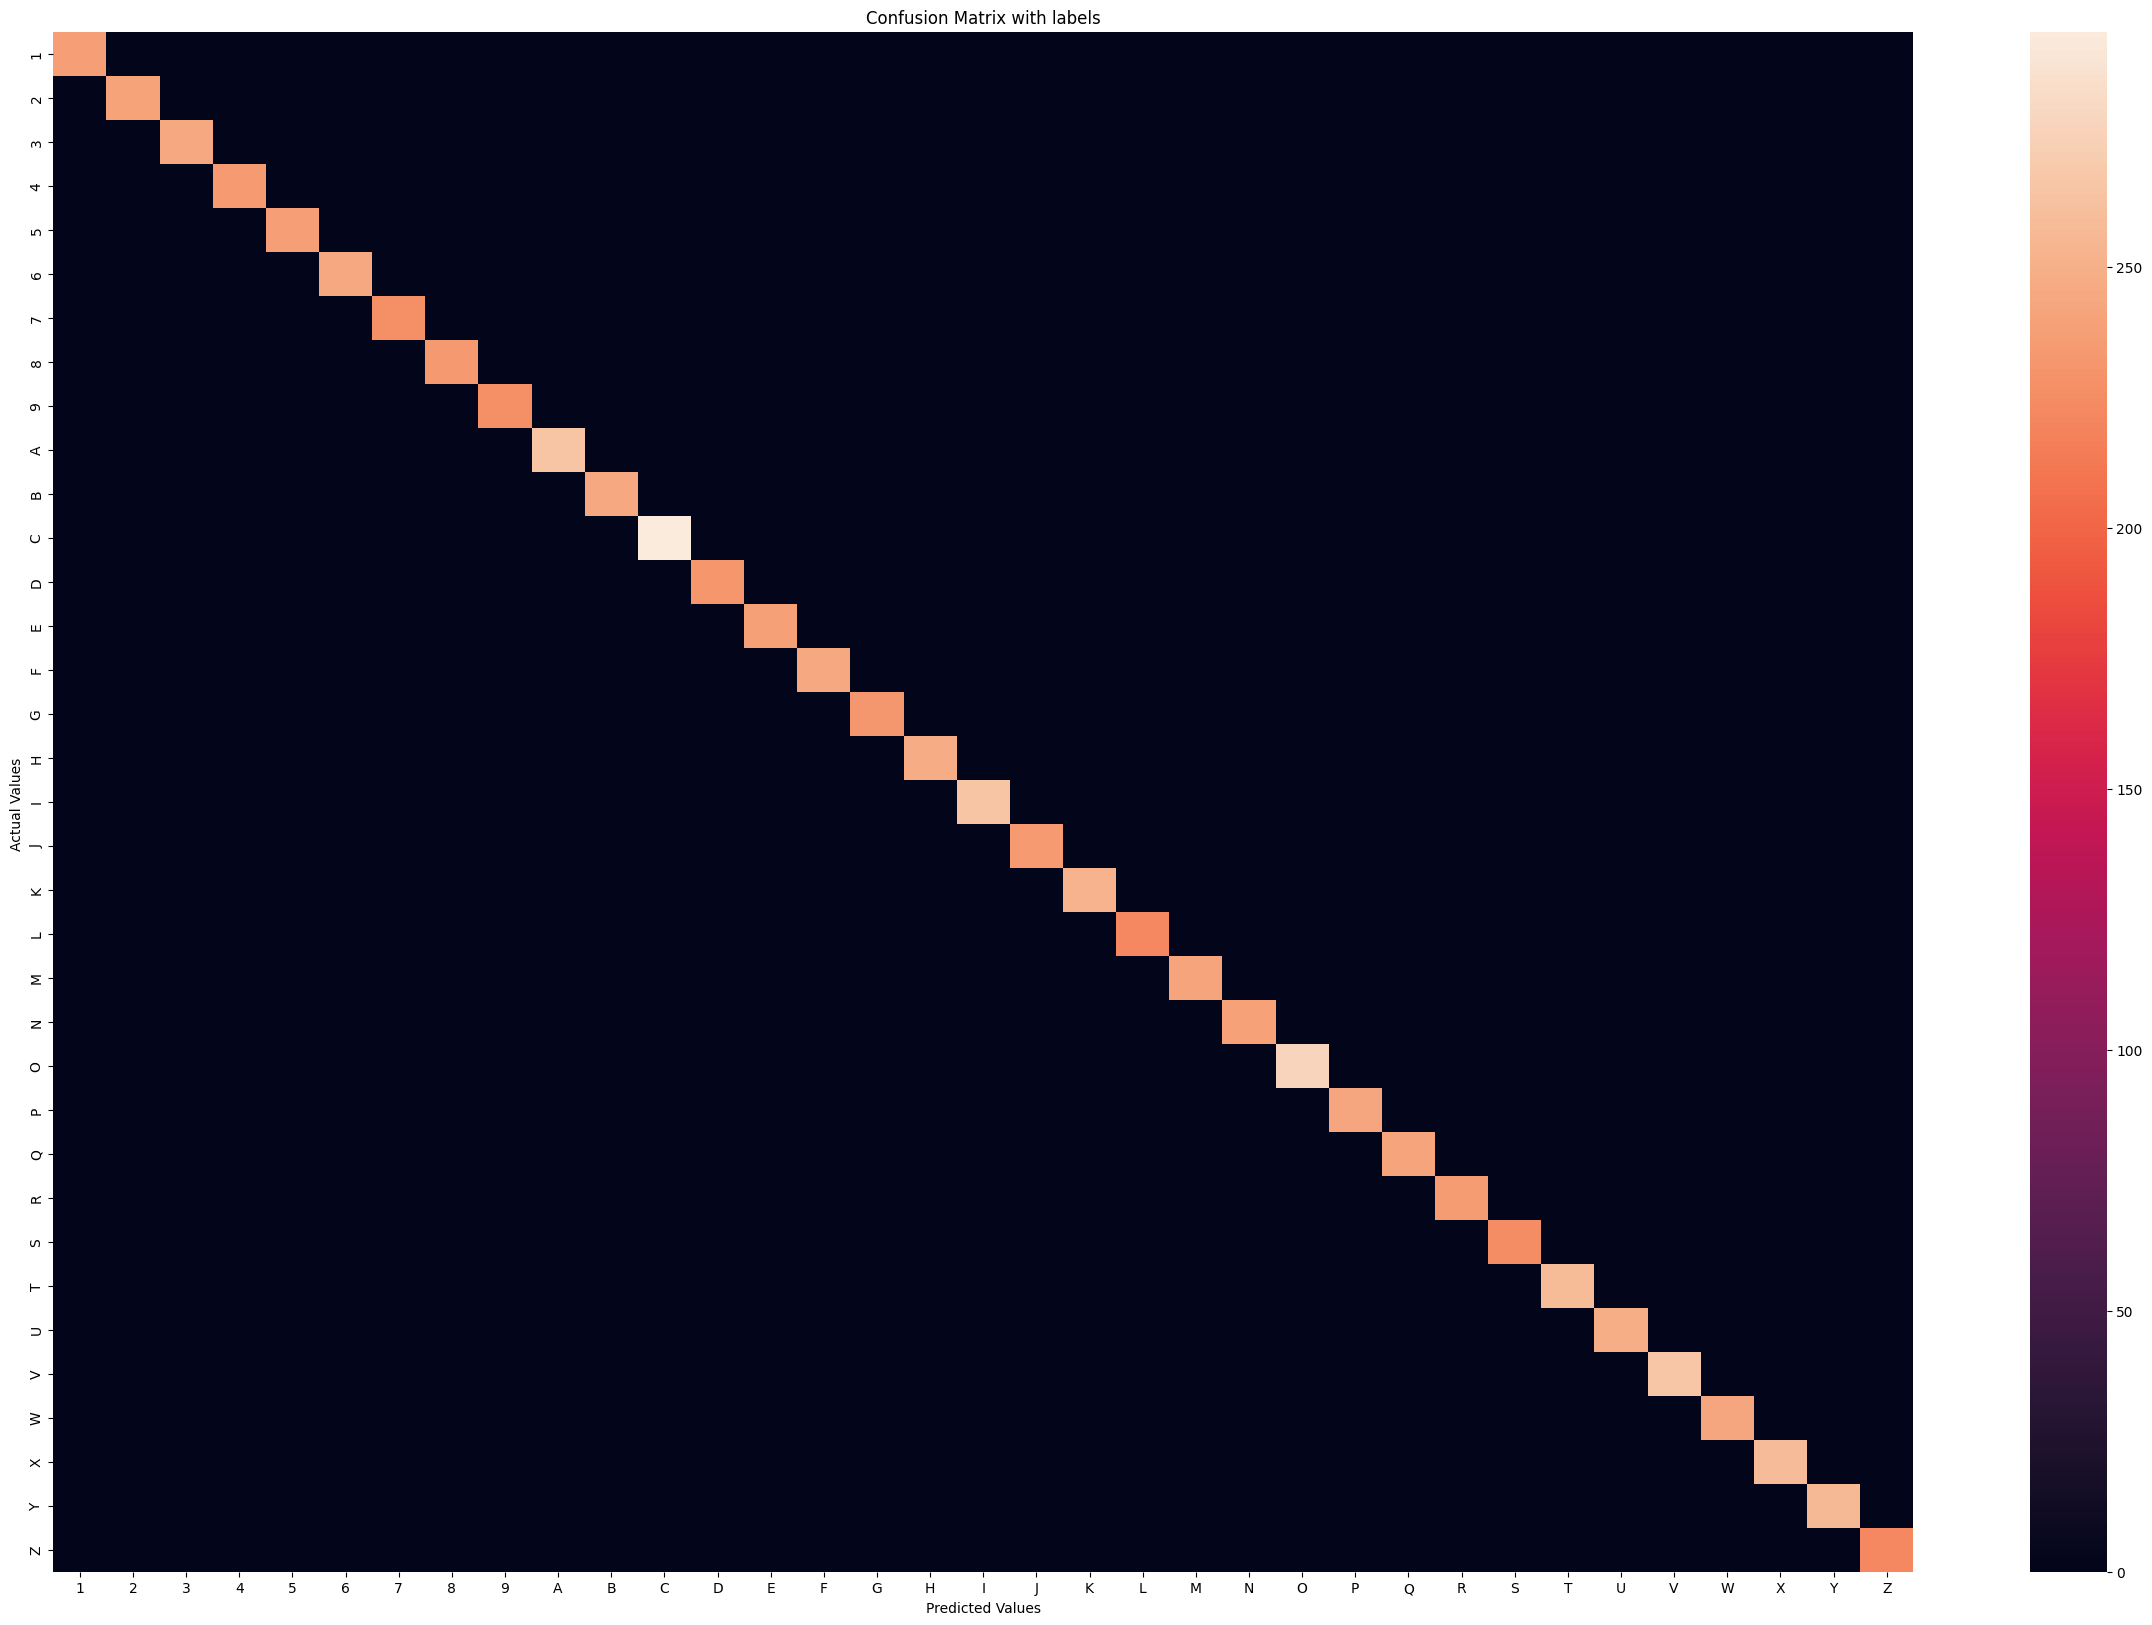

In [ ]:
plt.figure(figsize=(30, 20))

ax = sns.heatmap(metrics.confusion_matrix(Y_true,Y_pred_classes))
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

plt.show()

In [ ]:
confusion = metrics.confusion_matrix(Y_true,Y_pred_classes)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[237   0   0 ...   0   0   0]
 [  0 240   0 ...   0   0   0]
 [  0   0 245 ...   0   0   0]
 ...
 [  0   0   0 ... 259   0   0]
 [  0   0   0 ...   0 256   0]
 [  0   0   0 ...   0   0 222]]


In [ ]:
model=tf.keras.models.load_model('ISL_Predictor.h5')
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 35)                  │           4,515 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 584,677 (2.23 MB)

 Trainable params: 584,675 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# Evaluate the model on the test set to get accuracy and loss
score = model.evaluate(x_test, y_test, verbose=0)
loss = score[0]
accuracy = score[1]

# Predict class probabilities and convert them to class labels
y_pred = model.predict(x_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate additional metrics
f1 = f1_score(y_true, y_pred_classes, average="weighted")
precision = precision_score(y_true, y_pred_classes, average="weighted")
recall = recall_score(y_true, y_pred_classes, average="weighted")

# Print metrics
print("Model Evaluation Metrics:")
print(f"➔ Accuracy Attained: {accuracy:.4f}")
print(f"➔ Loss: {loss:.4f}")
print(f"➔ F1 Score: {f1:.2f}")
print(f"➔ Precision: {precision:.2f}")
print(f"➔ Recall: {recall:.2f}")

# Optional: Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_true, y_pred_classes))


Model Evaluation Metrics:
➔ Accuracy Attained: 1.0000
➔ Loss: 0.0000
➔ F1 Score: 1.00
➔ Precision: 1.00
➔ Recall: 1.00

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       1.00      1.00      1.00       240
           2       1.00      1.00      1.00       245
           3       1.00      1.00      1.00       234
           4       1.00      1.00      1.00       237
           5       1.00      1.00      1.00       245
           6       1.00      1.00      1.00       227
           7       1.00      1.00      1.00       233
           8       1.00      1.00      1.00       227
           9       1.00      1.00      1.00       265
          10       1.00      1.00      1.00       245
          11       1.00      1.00      1.00       295
          12       1.00      1.00      1.00       231
          13       1.00      1.00      1.00       238
          14       1.00      1.00    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


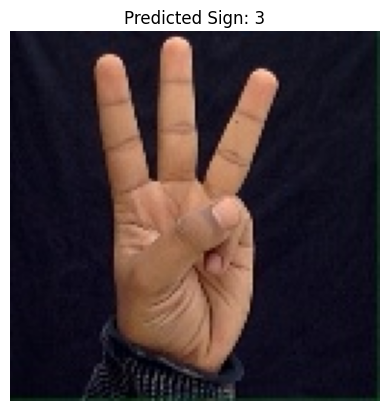

In [ ]:
import cv2
import numpy as np
from keras.models import load_model
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('/content/ISL_Predictor.h5', compile=False)

# Define the class labels for mapping
map_characters = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9',
                  9: 'A', 10: 'B', 11: 'C', 12: 'D', 13: 'E', 14: 'F', 15: 'G', 16: 'H',
                  17: 'I', 18: 'J', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P',
                  25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'W', 32: 'X',
                  33: 'Y', 34: 'Z'}

# Function to preprocess the image
def preprocess_image(img_path):
    img = cv2.imread(img_path)  # Load image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.GaussianBlur(img, (5, 5), 2)  # Blur for better edge detection
    _, img = cv2.threshold(img, 70, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)  # Thresholding

    img = cv2.resize(img, (64, 64))  # Resize to match model input shape
    img = img_to_array(img)  # Convert to array
    img = img.reshape(-1, 64, 64, 1)  # Reshape for model input (batch, height, width, channels)
    img = img / 255.0  # Normalize the image

    return img

# Function to predict the sign and display the image
def predict_and_display_sign(img_path):

    # Display the input image
    img_original = cv2.imread(img_path)
    img_prediction = img_path.split('/')[-2]
    img_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying

    #model prediction
    img_preprocessed = preprocess_image(img_path)  # Preprocess the image
    prediction = model.predict(img_preprocessed)  # Get the model's prediction
    pred_class = np.argmax(prediction, axis=1)[0]  # Get the class with highest probability
    img_predicton=map_characters.get(pred_class, 'Unknown')

    # Show the image and prediction in a matplotlib window'
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Predicted Sign: {img_prediction}")
    plt.show()

# Provide the path to a random image for prediction
img_path = "/content/dataset/Indian/3/0.jpg"
predict_and_display_sign(random_img_path)

In [ ]:
!pip install cvzone

  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26298 sha256=445befb9e5f4eee293154cd3a3c4fe12574bd812cf4fd008fae3b7a93174682d
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone


In [ ]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 17.2 MB/s eta 0:00:00


In [ ]:
!pip install keras

In [ ]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency re

In [ ]:
!pip install --upgrade keras

In [ ]:
import cv2
from cvzone.HandTrackingModule import HandDetector
import tensorflow as tf
from keras.models import load_model
import numpy as np
import math
from tensorflow.keras.utils import img_to_array
from keras.optimizers import Adam
import time
adam = Adam(learning_rate=0.00001)

map_characters = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: 'A', 10: 'B', 11: 'C', 12: 'D',
                  13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'I', 18: 'J', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P',
                  25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'W', 32: 'X', 33: 'Y', 34: 'Z'}


imgpath=cv2.imread("/content/dataset/Indian/2/0.jpg")



def edge_detection(image):
    minValue = 70
    blur = cv2.GaussianBlur(image,(5,5),2)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return res

def preprocessor_predict(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = edge_detection(img)
    img = img_to_array(img)
    cv2.imshow("Imgpreprocess",img)

    img = cv2.resize(img, (64,64))
    img = img.reshape(-1, 64, 64, 1)
    # imglist=[img,[]]

    return predictor(img)



def predictor(img):
    model=load_model('SignLanguage/ISL_Predictor.h5',compile=False)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    pred=model.predict(img)
    return pred









cap = cv2.VideoCapture(0,cv2.CAP_DSHOW)
detector=HandDetector(maxHands=2)
offset=15
imgSize=300



while True:
    success, img = cap.read()
    if not success:
        print("Failed to capture image")
        break  # Break if image capture fails
    hands, img = detector.findHands(img)
    cv2.imshow("Originalimg",img)
    if hands:
        hand=hands[0]
        x, y, w, h = hand['bbox']

        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8)*255

        imgCrop = img[y-offset:y + h + offset, x-offset:x + w + offset]
        imgCropShape = imgCrop.shape

        aspectRatio = h / w

        if aspectRatio > 1:
            k = imgSize / h
            wCal = math.ceil(k * w)
            imgResize = cv2.resize(imgCrop, (wCal, imgSize))
            imgResizeShape = imgResize.shape
            wGap = math.ceil((imgSize-wCal)/2)
            imgWhite[:, wGap: wCal + wGap] = imgResize

        else:
            k = imgSize / w
            hCal = math.ceil(k * h)
            imgResize = cv2.resize(imgCrop, (imgSize, hCal))
            imgResizeShape = imgResize.shape
            hGap = math.ceil((imgSize - hCal) / 2)
            imgWhite[hGap: hCal + hGap, :] = imgResize
        cv2.imshow("ImgWhite",imgWhite)
        predtor=preprocessor_predict(imgWhite)
        pred_classes = np.argmax(predtor,axis = 1)
        print(map_characters.get(pred_classes[0]))


        # Break the loop when 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break


cap.release()
cv2.destroyAllWindows()

Failed to capture image


In [ ]:
import cv2

cap = cv2.VideoCapture(1)
while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture image")
        break
    cv2.imshow("Webcam Test", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Failed to capture image


In [ ]:
import cv2

cap = cv2.VideoCapture(0)  # Try 0 or 1 here

if not cap.isOpened():
    print("Cannot open camera")
    cap.release()
else:
    print("Camera opened successfully")
    cap.release()


Cannot open camera


In [ ]:
!pip install --upgrade opencv-python opencv-python-headless


In [ ]:
!pip install --upgrade numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 116.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.1.3 which is incompatible.
mediapipe 0.10.18 requires numpy<2, but you have numpy 2.1.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.1.3 which is incompatible.
tensorflow-text 2.15.0 requires tensorflow<2.16,>=2.15.0; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.1

In [ ]:
import cv2

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)  # Try CAP_DSHOW on Windows, or CAP_GSTREAMER on Linux

if not cap.isOpened():
    print("Cannot open camera with this backend")
    cap.release()


Cannot open camera with this backend


In [ ]:
!pip install opencv-python